#### PROBLEM STATEMENT -
##### Prepare a model for glass classification using KNN



In [2]:
## Importing packages

In [1]:
# KNN Classification
from pandas import read_csv
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

import warnings
warnings.filterwarnings("ignore")

In [3]:
## Reading the data

In [4]:
df_glass = pd.read_csv("E:\\deeksha\\python\\data\\glass.csv")

In [6]:
## Performing EDA on data

In [5]:
df_glass.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [7]:
df_glass.size

2140

In [8]:
df_glass.shape

(214, 10)

In [9]:
 df_glass["Type"].unique()

array([1, 2, 3, 5, 6, 7], dtype=int64)

In [19]:
df_glass.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [20]:
df_glass.isna().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [10]:
df_glass.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [11]:
df_glass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [12]:
df_glass.corr()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
RI,1.000000,-0.191885,-0.122274,-0.407326,-0.542052,-0.289833,0.810403,-0.000386,0.143010,-0.164237
Na,-0.191885,1.000000,-0.273732,0.156794,-0.069809,-0.266087,-0.275442,0.326603,-0.241346,0.502898
Mg,-0.122274,-0.273732,1.000000,-0.481799,-0.165927,0.005396,-0.443750,-0.492262,0.083060,-0.744993
Al,-0.407326,0.156794,-0.481799,1.000000,-0.005524,0.325958,-0.259592,0.479404,-0.074402,0.598829
Si,-0.542052,-0.069809,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.102151,-0.094201,0.151565
K,-0.289833,-0.266087,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.042618,-0.007719,-0.010054
Ca,0.810403,-0.275442,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,-0.112841,0.124968,0.000952
Ba,-0.000386,0.326603,-0.492262,0.479404,-0.102151,-0.042618,-0.112841,1.000000,-0.058692,0.575161
Fe,0.143010,-0.241346,0.083060,-0.074402,-0.094201,-0.007719,0.124968,-0.058692,1.000000,-0.188278
Type,-0.164237,0.502898,-0.744993,0.598829,0.151565,-0.010054,0.000952,0.575161,-0.188278,1.000000


In [13]:
df_glass.corr().plot

In [17]:
correlation_matrix = df_glass.corr()

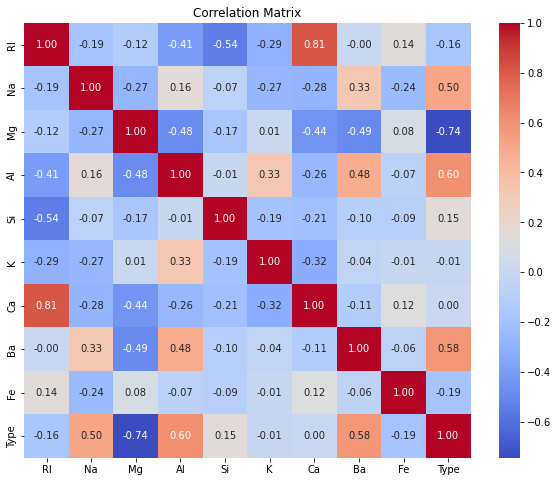

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

import warnings
warnings.filterwarnings("ignore")

In [22]:
## using kfold

In [23]:
#num_folds = 10
kfold = KFold(n_splits=10)

In [24]:
# splitting the data n assigning X,y

In [25]:
X = df_glass.iloc[:,1:]
y = df_glass.iloc[:,-1]

In [26]:
X.head()

,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [27]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Type, dtype: int64

In [28]:
model = KNeighborsClassifier(n_neighbors=10)
results = cross_val_score(model, X, y, cv=kfold)

In [29]:
results

array([1.        , 1.        , 1.        , 1.        , 0.76190476,
       0.85714286, 0.95238095, 0.        , 0.57142857, 0.04761905])

In [30]:
model = KNeighborsClassifier(n_neighbors=12)
results = cross_val_score(model, X, y, cv=kfold)

In [31]:
results

array([1.        , 1.        , 1.        , 1.        , 0.76190476,
       0.80952381, 0.95238095, 0.        , 0.52380952, 0.04761905])

In [32]:
print(results.mean())

0.7095238095238094


### using hyperparameter tunning-

In [40]:
###here i am using Grid Search for Algorithm Tuning


In [34]:
# Grid Search for Algorithm Tuning
from sklearn.model_selection import GridSearchCV

In [35]:
n_neighbors= np.array(range(1,40))
param_grid = dict(n_neighbors=n_neighbors)

In [36]:
param_grid

{'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39])}

In [37]:
model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(X, y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])})

In [39]:
print(grid.best_score_)
print(grid.best_params_)

0.9627906976744185
{'n_neighbors': 1}


### Visualizing the CV results

In [41]:
# search for an optimal value of K for KNN

# range of k we want to try
k_range = range(1, 40)
# empty list to store scores
k_scores = []

#we will loop through reasonable values of k
for k in k_range:
    # 2. run KNeighborsClassifier with k neighbours
    knn = KNeighborsClassifier(n_neighbors=k)
    # 3. obtain cross_val_score for KNeighborsClassifier with k neighbours
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    # 4. append mean of scores for k neighbors to k_scores list
    k_scores.append(scores.mean())


# k_scores=grid.best_score_
pd.Series(k_scores).sort_values(ascending=False)

0     0.962987
9     0.957792
2     0.953247
7     0.953030
6     0.948268
8     0.948268
10    0.948268
1     0.944156
5     0.943939
4     0.943939
3     0.943939
11    0.943506
12    0.943506
13    0.933983
14    0.924892
18    0.924892
15    0.920130
16    0.920130
17    0.920130
19    0.906494
20    0.897403
21    0.873810
22    0.869048
23    0.864069
24    0.854978
25    0.821861
26    0.812338
27    0.812338
28    0.807792
29    0.803030
30    0.798485
32    0.793723
31    0.793506
33    0.784199
35    0.779654
34    0.774892
36    0.770130
37    0.770130
38    0.770130
dtype: float64

### plotting a graph-

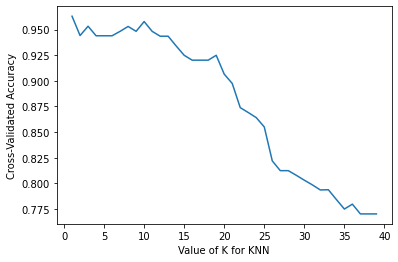

In [42]:
import matplotlib.pyplot as plt
%matplotlib inline

# choose k between 1 to 40
k_range = range(1, 40)
k_scores = []

# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10)
    k_scores.append(scores.mean())

# plot to see clearly
plt.plot(k_range, k_scores)


plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

#### In this case, the best cross-validated score is approximately 0.9628 (or 96.28%)
##### and the best-performing hyperparameter for the KNeighborsClassifier is 'n_neighbors': 1
##### This means that with a value of 1 for the number of neighbors, your KNeighborsClassifier
##### achieved the highest cross-validated score of approximately 96.28%.